In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

# 한글폰트설치
from matplotlib import font_manager, rc
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 표시
plt.rc('font', family = 'Malgun Gothic')

In [2]:
# 데이터 불러오기
Movies = pd.read_csv('Data/Movies_등급수정.csv')

# 개봉일, 기준일 타입 변경
Movies['개봉일'] = Movies['개봉일'].astype('datetime64[ns]')
Movies['기준일'] = pd.to_datetime(Movies['기준일'])

## 데이터 분류

In [3]:
# 전체영화
movies = Movies.sort_values(['영화명','개봉일','기준일']).drop_duplicates(["영화명",'개봉일'],keep = 'last')

# 액션영화
actions = movies[movies.장르.str.contains('액션')]

# 누적관객수 100만 이상 영화
million = movies[movies.누적관객수>=1000000]

# 누적관객수 100만 이상 액션 영화
million_action = movies[movies.장르.str.contains('액션')][movies.누적관객수>=1000000]

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9636\596198042.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  million_action = movies[movies.장르.str.contains('액션')][movies.누적관객수>=1000000]


In [95]:
# 전체영화 국적별
movies_ctry = movies.groupby('대표국적').size()

# 액션영화 국적별
actions_ctry = actions.groupby('대표국적').size()

# 누적관객수 100만 이상 영화 국적
million_ctry = million.groupby('대표국적').size()

# 누적관객수 100만 이상 액션 영화 국적
million_action_ctry = million_action.groupby('대표국적').size()

In [118]:
# 전체영화 국적 평균 이하 묶기
movies_ctry_sort = movies_ctry.sort_values(ascending = False)
movies_ctry_sort_cut = movies_ctry_sort[movies_ctry_sort.values >= movies_ctry_sort.mean()]
etc = movies_ctry_sort[movies_ctry_sort.values < movies_ctry_sort.mean()].sum()
et = pd.Series(etc, index = ['하위66개국'])
movies_ctry_cut = pd.concat([movies_ctry_sort_cut,et])

In [142]:
# 액션영화 국적 하위 묶기 (전체영화 대비 비슷한 비율)
actions_ctry_sort = actions_ctry.sort_values(ascending = False)
actions_ctry_sort_cut = actions_ctry_sort[actions_ctry_sort.values >= actions_ctry.sort_values(ascending = False).sum()*0.02]
etc = actions_ctry_sort[actions_ctry_sort.values < actions_ctry.sort_values(ascending = False).sum()*0.02].sum()
et = pd.Series(etc, index = ['하위42개국'])
actions_ctry_cut = pd.concat([actions_ctry_sort_cut,et])

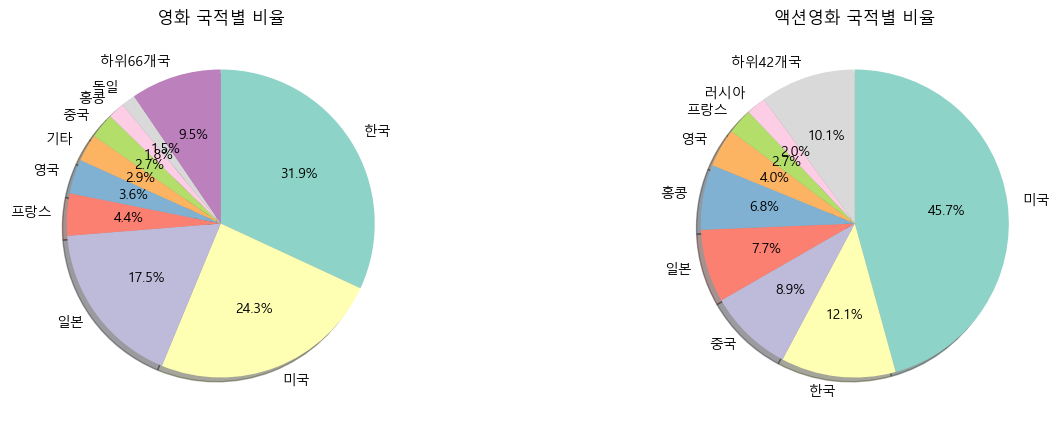

In [145]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

colors = sns.color_palette("Set3")

ax1.pie(movies_ctry_cut.values, labels = movies_ctry_cut.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors, shadow = True)

ax2.pie(actions_ctry_cut.values, labels = actions_ctry_cut.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors, shadow = True)
ax1.set_title('영화 국적별 비율')
ax2.set_title('액션영화 국적별 비율')
plt.show()

In [163]:
# 누적관객수 100만 이상 영화 국적별
million_ctry = million_ctry.sort_values(ascending = False)
million_ctry_sort_cut = million_ctry[million_ctry > 10]                                 
etc = million_ctry[million_ctry < 10].sum()
et = pd.Series(etc, index = ['기타'])
million_ctry_cut = pd.concat([million_ctry_sort_cut,et])

# 누적관객수 100만 이상 액션 영화 국적별
million_action_ctry = million_action_ctry.sort_values(ascending = False)
million_action_ctry_sort_cut = million_action_ctry[million_action_ctry > 10]                                 
etc = million_action_ctry[million_action_ctry < 10].sum()
et = pd.Series(etc, index = ['기타'])
million_action_ctry_cut = pd.concat([million_action_ctry_sort_cut,et])

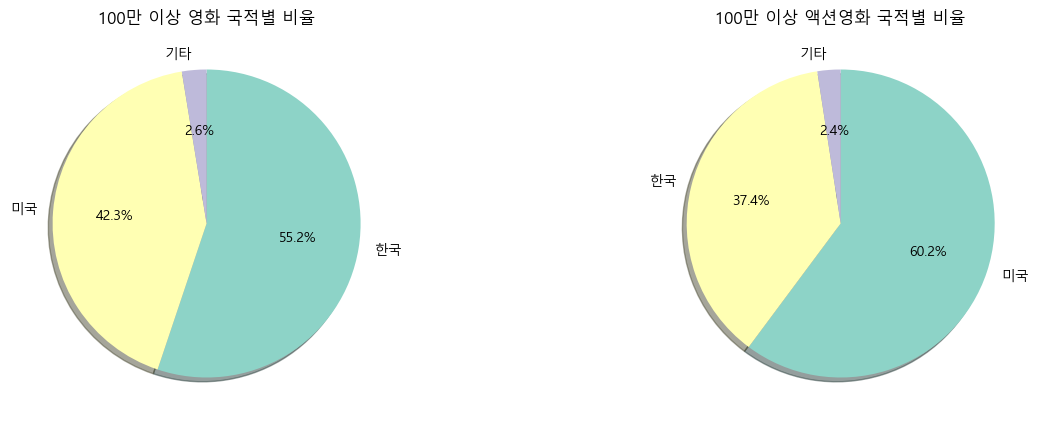

In [166]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

colors = sns.color_palette("Set3")

ax1.pie(million_ctry_cut.values, labels = million_ctry_cut.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors, shadow = True)

ax2.pie(million_action_ctry_cut.values, labels = million_action_ctry_cut.index, autopct = '%.1f%%', 
        startangle = 90, counterclock = False, colors = colors, shadow = True)
ax1.set_title('100만 이상 영화 국적별 비율')
ax2.set_title('100만 이상 액션영화 국적별 비율')
plt.show()